<a href="https://colab.research.google.com/github/2303A52054/HPC/blob/main/HPC_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Serial execution time: 4.0400 seconds
Parallel execution time: 8.7225 seconds
Speedup: 0.46x


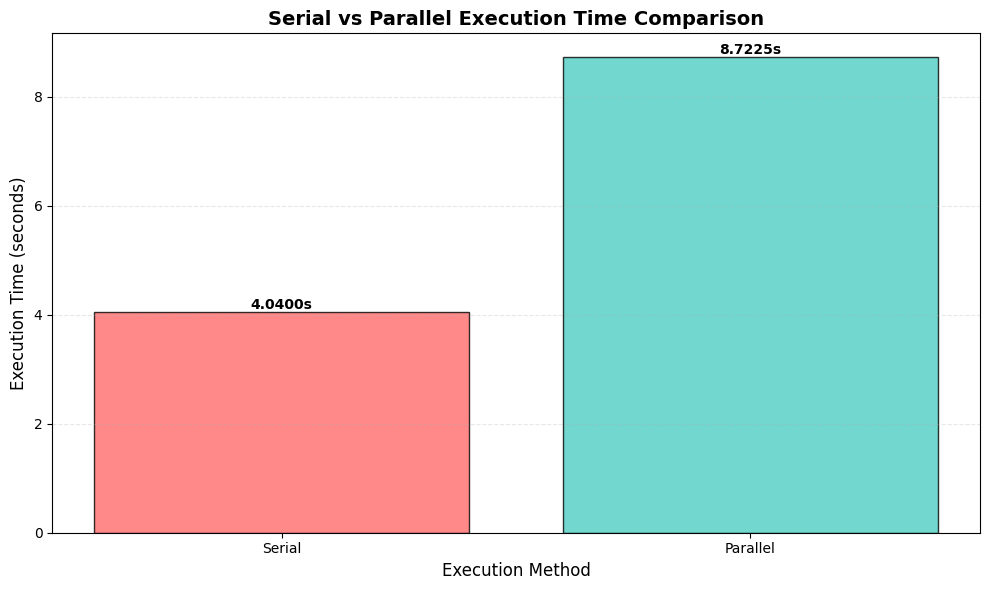

In [9]:
#Assignment 1
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt

# Initialize two large vectors
size = 10000000
vector_a = np.random.rand(size)
vector_b = np.random.rand(size)

# Serial vector addition
def serial_addition(a, b):
    result = np.zeros(len(a))
    for i in range(len(a)):
        result[i] = a[i] + b[i]
    return result

# Parallel vector addition
def add_chunk(args):
    start, end, a, b = args
    result = np.zeros(end - start)
    for i in range(end - start):
        result[i] = a[start + i] + b[start + i]
    return result

def parallel_addition(a, b, num_processes=4):
    chunk_size = len(a) // num_processes
    chunks = []
    for i in range(num_processes):
        start = i * chunk_size
        end = len(a) if i == num_processes - 1 else (i + 1) * chunk_size
        chunks.append((start, end, a, b))

    with Pool(num_processes) as pool:
        results = pool.map(add_chunk, chunks)

    return np.concatenate(results)

# Serial execution
start_time = time.time()
serial_result = serial_addition(vector_a, vector_b)
serial_time = time.time() - start_time

# Parallel execution
start_time = time.time()
parallel_result = parallel_addition(vector_a, vector_b)
parallel_time = time.time() - start_time

# Compare execution time
print(f"Serial execution time: {serial_time:.4f} seconds")
print(f"Parallel execution time: {parallel_time:.4f} seconds")
print(f"Speedup: {serial_time/parallel_time:.2f}x")

# Graph
plt.figure(figsize=(10, 6))
methods = ['Serial', 'Parallel']
times = [serial_time, parallel_time]
colors = ['#FF6B6B', '#4ECDC4']

bars = plt.bar(methods, times, color=colors, alpha=0.8, edgecolor='black')
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.xlabel('Execution Method', fontsize=12)
plt.title('Serial vs Parallel Execution Time Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, (method, time_val) in enumerate(zip(methods, times)):
    plt.text(i, time_val + 0.01, f'{time_val:.4f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Thread 0: Processed elements 0 to 2499999, Time: 6.3520s
Thread 1: Processed elements 2500000 to 4999999, Time: 6.4817s
Thread 2: Processed elements 5000000 to 7499999, Time: 6.4376s
Thread 3: Processed elements 7500000 to 9999999, Time: 5.4846s

Total execution time: 10.3502 seconds
Work distributed equally among 4 threads


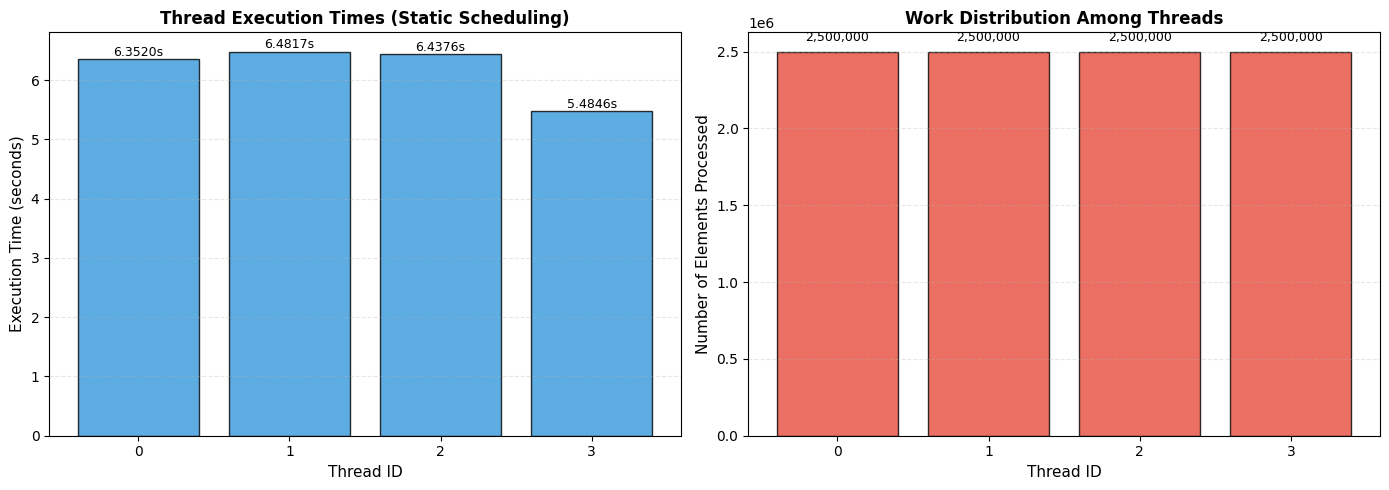

In [10]:
#Assignment 2
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt

# Initialize input arrays
size = 10000000
array_a = np.random.rand(size)
array_b = np.random.rand(size)

# Vector computation with static scheduling
def compute_chunk(args):
    start, end, a, b, thread_id = args
    start_time = time.time()
    result = np.zeros(end - start)
    for i in range(end - start):
        result[i] = a[start + i] * 2 + b[start + i] * 3
    exec_time = time.time() - start_time
    print(f"Thread {thread_id}: Processed elements {start} to {end-1}, Time: {exec_time:.4f}s")
    return result, exec_time, end - start

def static_scheduling(a, b, num_threads=4):
    chunk_size = len(a) // num_threads
    chunks = []
    for i in range(num_threads):
        start = i * chunk_size
        end = len(a) if i == num_threads - 1 else (i + 1) * chunk_size
        chunks.append((start, end, a, b, i))

    with Pool(num_threads) as pool:
        results = pool.map(compute_chunk, chunks)

    return results

# Measure execution time
start_time = time.time()
results = static_scheduling(array_a, array_b)
execution_time = time.time() - start_time

print(f"\nTotal execution time: {execution_time:.4f} seconds")
print(f"Work distributed equally among {len(results)} threads")

# Extract data for graphs
thread_ids = [i for i in range(len(results))]
times = [r[1] for r in results]
work_items = [r[2] for r in results]

# Create graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Thread execution times
ax1.bar(thread_ids, times, color='#3498DB', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Thread ID', fontsize=11)
ax1.set_ylabel('Execution Time (seconds)', fontsize=11)
ax1.set_title('Thread Execution Times (Static Scheduling)', fontsize=12, fontweight='bold')
ax1.set_xticks(thread_ids)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, t in enumerate(times):
    ax1.text(i, t + 0.001, f'{t:.4f}s', ha='center', va='bottom', fontsize=9)

# Graph 2: Work distribution
ax2.bar(thread_ids, work_items, color='#E74C3C', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Thread ID', fontsize=11)
ax2.set_ylabel('Number of Elements Processed', fontsize=11)
ax2.set_title('Work Distribution Among Threads', fontsize=12, fontweight='bold')
ax2.set_xticks(thread_ids)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, w in enumerate(work_items):
    ax2.text(i, w + 50000, f'{w:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Thread 1: Time = 54.4876s, Light=138, Heavy=112
Thread 3: Time = 55.9172s, Light=133, Heavy=117
Thread 2: Time = 59.1931s, Light=118, Heavy=132
Thread 0: Time = 60.0570s, Light=110, Heavy=140

Total execution time: 60.1547 seconds
Load imbalance observed due to uneven workload distribution


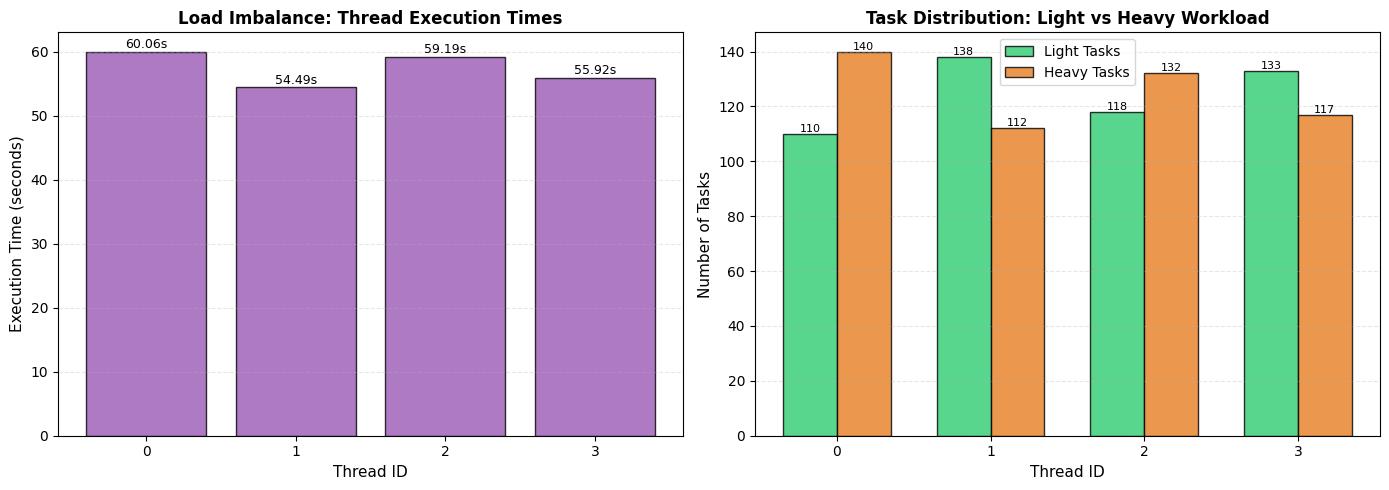

In [11]:
#Assignment 3
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt

# Create array of random numbers
size = 1000
random_array = np.random.rand(size)

# Computation function with varying workload
def compute_element(args):
    index, value = args
    if value < 0.5:
        # Light computation
        result = value * 2
    else:
        # Heavy computation
        result = value
        for _ in range(1000000):
            result = result * 1.0001
    return result

def process_chunk(args):
    start, end, array, thread_id = args
    start_time = time.time()
    results = []
    light_count = 0
    heavy_count = 0

    for i in range(start, end):
        if array[i] < 0.5:
            light_count += 1
        else:
            heavy_count += 1
        results.append(compute_element((i, array[i])))

    chunk_time = time.time() - start_time
    print(f"Thread {thread_id}: Time = {chunk_time:.4f}s, Light={light_count}, Heavy={heavy_count}")
    return results, chunk_time, light_count, heavy_count

def parallel_with_static(array, num_threads=4):
    chunk_size = len(array) // num_threads
    chunks = []
    for i in range(num_threads):
        start = i * chunk_size
        end = len(array) if i == num_threads - 1 else (i + 1) * chunk_size
        chunks.append((start, end, array, i))

    with Pool(num_threads) as pool:
        results = pool.map(process_chunk, chunks)

    return results

# Measure execution time
start_time = time.time()
results = parallel_with_static(random_array)
total_time = time.time() - start_time

print(f"\nTotal execution time: {total_time:.4f} seconds")
print("Load imbalance observed due to uneven workload distribution")

# Extract data
thread_ids = list(range(len(results)))
thread_times = [r[1] for r in results]
light_counts = [r[2] for r in results]
heavy_counts = [r[3] for r in results]

# Create graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Thread execution times showing imbalance
ax1.bar(thread_ids, thread_times, color='#9B59B6', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Thread ID', fontsize=11)
ax1.set_ylabel('Execution Time (seconds)', fontsize=11)
ax1.set_title('Load Imbalance: Thread Execution Times', fontsize=12, fontweight='bold')
ax1.set_xticks(thread_ids)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, t in enumerate(thread_times):
    ax1.text(i, t + 0.1, f'{t:.2f}s', ha='center', va='bottom', fontsize=9)

# Graph 2: Workload distribution (light vs heavy)
x = np.arange(len(thread_ids))
width = 0.35

bars1 = ax2.bar(x - width/2, light_counts, width, label='Light Tasks', color='#2ECC71', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, heavy_counts, width, label='Heavy Tasks', color='#E67E22', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Thread ID', fontsize=11)
ax2.set_ylabel('Number of Tasks', fontsize=11)
ax2.set_title('Task Distribution: Light vs Heavy Workload', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(thread_ids)
ax2.legend()
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [12]:
#Assignment 4
import numpy as np
from multiprocessing import Pool

# Initialize large array
size = 10000000
array = np.random.rand(size)

# Parallel sum with reduction
def sum_chunk(args):
    start, end, array = args
    local_sum = 0
    for i in range(start, end):
        local_sum += array[i]
    return local_sum

def parallel_reduction(array, num_threads=4):
    chunk_size = len(array) // num_threads
    chunks = []
    for i in range(num_threads):
        start = i * chunk_size
        end = len(array) if i == num_threads - 1 else (i + 1) * chunk_size
        chunks.append((start, end, array))

    with Pool(num_threads) as pool:
        partial_sums = pool.map(sum_chunk, chunks)

    # Reduction: combine partial sums
    total_sum = sum(partial_sums)
    return total_sum

# Compute sum using reduction
final_sum = parallel_reduction(array)

print(f"Sum of all elements: {final_sum:.4f}")
print("Race condition avoided using reduction technique")

Sum of all elements: 4998706.6635
Race condition avoided using reduction technique


In [13]:
#Assignment 5
import numpy as np
from multiprocessing import Pool
import time

# Initialize data
size = 1000
data = np.random.rand(size)

def worker_phase(args):
    thread_id, start, end, data = args

    # Phase 1: Computation
    print(f"Thread {thread_id}: Starting Phase 1")
    temp_results = np.zeros(end - start)
    for i in range(end - start):
        temp_results[i] = data[start + i] * 2
    print(f"Thread {thread_id}: Completed Phase 1")

    # Phase 2: Computation using Phase 1 results
    print(f"Thread {thread_id}: Starting Phase 2")
    final_results = np.zeros(end - start)
    for i in range(end - start):
        final_results[i] = temp_results[i] + 10
    print(f"Thread {thread_id}: Completed Phase 2")

    return final_results

def two_phase_computation(data, num_threads=4):
    chunk_size = len(data) // num_threads
    chunks = []

    for i in range(num_threads):
        start = i * chunk_size
        end = len(data) if i == num_threads - 1 else (i + 1) * chunk_size
        chunks.append((i, start, end, data))

    # Pool.map ensures barrier-like synchronization
    # All workers complete Phase 1 before any start Phase 2
    with Pool(num_threads) as pool:
        results = pool.map(worker_phase, chunks)

    return np.concatenate(results)

# Execute two-phase computation
final_results = two_phase_computation(data)

print("\nAll threads completed both phases successfully")
print("Barrier synchronization ensured correct execution order")

Thread 0: Starting Phase 1Thread 1: Starting Phase 1Thread 2: Starting Phase 1


Thread 3: Starting Phase 1
Thread 1: Completed Phase 1Thread 2: Completed Phase 1Thread 3: Completed Phase 1
Thread 0: Completed Phase 1


Thread 2: Starting Phase 2Thread 3: Starting Phase 2Thread 0: Starting Phase 2Thread 1: Starting Phase 2



Thread 3: Completed Phase 2Thread 2: Completed Phase 2Thread 0: Completed Phase 2
Thread 1: Completed Phase 2



All threads completed both phases successfully
Barrier synchronization ensured correct execution order
